<a href="https://colab.research.google.com/github/calamitousprincesss/Titanic-survival-prediction/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#loading dataset
import pandas as pd
mydata=pd.read_csv('/content/titanic.csv')


In [ ]:
mydata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
mydata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#NO. OF ROWS AND COLUMS
mydata.shape

(418, 12)

In [ ]:
#missing data
mydata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#handling missing data
mydata = mydata.drop(columns='Cabin', axis=1)

In [ ]:
mydata['Age'].fillna(mydata['Age'].mean(), inplace=True)

In [ ]:
print(mydata['Fare'].mode())

0    7.75
Name: Fare, dtype: float64


In [ ]:
print(mydata['Fare'].mode()[0])

7.75


In [ ]:
mydata['Fare'].fillna(mydata['Fare'].mode()[0], inplace=True)

In [ ]:
#checking for null values
mydata.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#splitting into test and train down
mydata['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [ ]:
X = mydata.drop(columns = 'Survived', axis=1)
Y = mydata['Survived']

In [ ]:
print(X)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex       Age  SibSp  Parch              Ticket      Fare Embarked  
0      male  34.50000      0      

In [ ]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(418, 10) (334, 10) (84, 10)


In [ ]:
sns.set()
sns.set_theme(style="darkgrid")

In [ ]:
df = sns.load_dataset('titanic')

<Axes: xlabel='Survived', ylabel='count'>

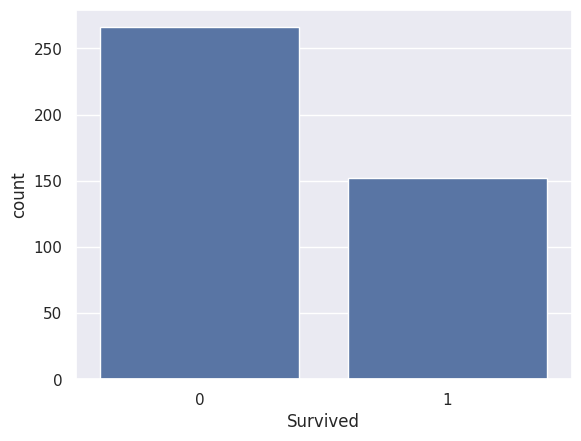

In [ ]:
sns.countplot(mydata, x="Survived")

In [ ]:
#survival rates for babies
youngest_to_survive = mydata[mydata['Survived'] == True]['Age'].min()
youngest_to_die = mydata[mydata['Survived'] == False]['Age'].min()
oldest_to_survive = mydata[mydata['Survived'] == True]['Age'].max()
oldest_to_die = mydata[mydata['Survived'] == False]['Age'].max()

print ( 'Youngest to survive: {} \nYoungest to die: {} \nOldest to survive: {} \nOldest to die: {}'.format(
youngest_to_survive, youngest_to_die, oldest_to_survive, oldest_to_die))


Youngest to survive: 0.17 
Youngest to die: 0.33 
Oldest to survive: 76.0 
Oldest to die: 67.0


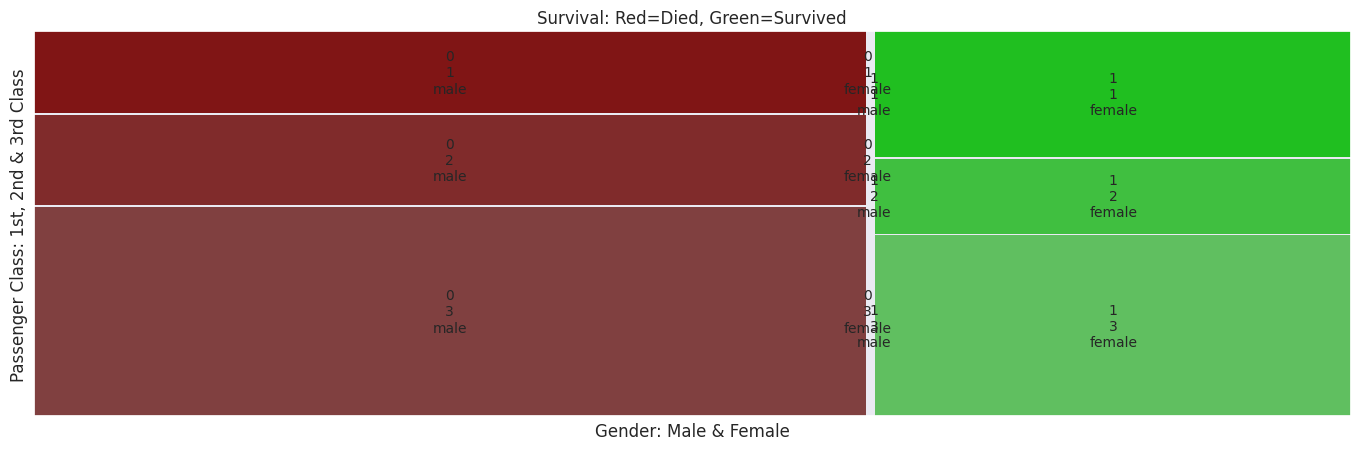

In [ ]:
# Mosaic Chart
from statsmodels.graphics.mosaicplot import mosaic
plt.rc('figure', figsize=(17, 5))

mosaic(mydata, ['Survived', 'Pclass', 'Sex'], axes_label=False, title='Survival: Red=Died, Green=Survived')
plt.xlabel('Gender: Male & Female')
plt.ylabel('Passenger Class: 1st, 2nd & 3rd Class')
plt.show()
#1-survived
#0-not survived
#second line number shows Pclass

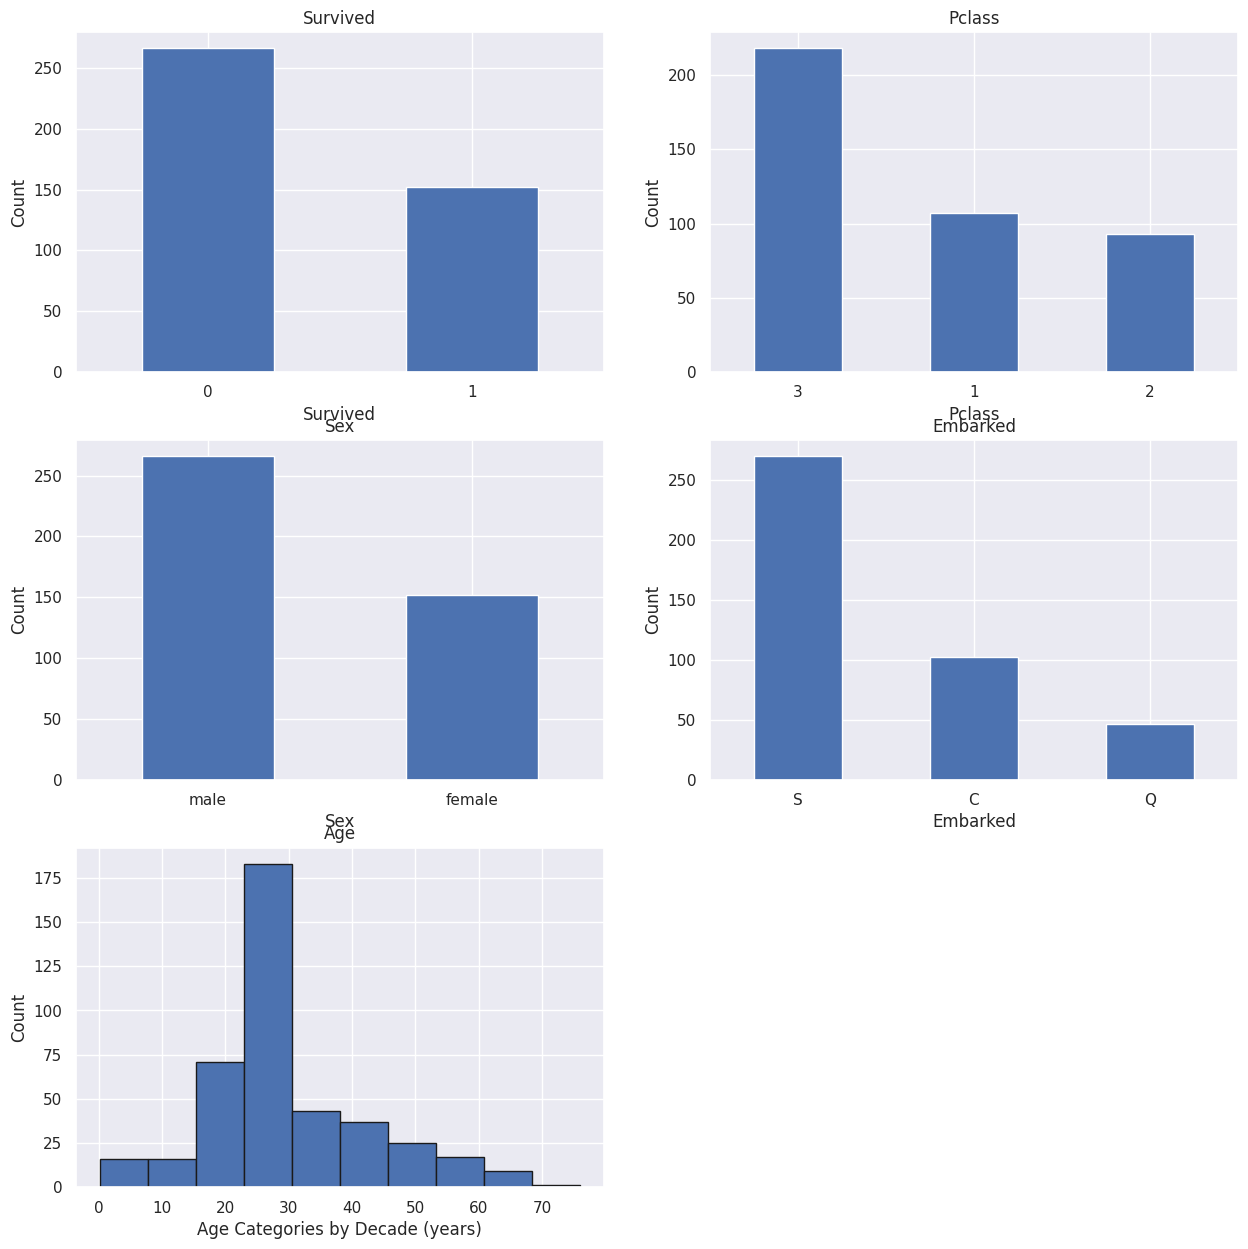

In [ ]:

cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

axes = axes.flat

for col, ax in zip(cols, axes):

    mydata[col].value_counts().plot(kind='bar', title=col, ax=ax, rot=0, ylabel='Count')

mydata['Age'].plot(kind='hist', ax=axes[4], ylabel='Count', xlabel='Age Categories by Decade (years)', ec='k', title='Age')

fig.delaxes(axes[5])

In [ ]:
# Passangers with no age
ageisnull = mydata[mydata['Age'].isnull()]
ageisnull.head()
print('Total passengers with no age: ', len(ageisnull))

Total passengers with no age:  0


In [ ]:
# Mean age by Sex
(mydata.groupby(['Sex']))['Age'].mean()

Sex
female    30.272400
male      30.272699
Name: Age, dtype: float64

In [ ]:
# Mean age by Pclass and Sex
(mydata.groupby(['Pclass', 'Sex']))['Age'].mean()

Pclass  Sex   
1       female    40.890904
        male      39.261546
2       female    24.573086
        male      30.898260
3       female    25.273153
        male      26.493421
Name: Age, dtype: float64

In [ ]:
# Mean age by Pclass, Survived and Sex
(mydata.groupby(['Pclass', 'Survived', 'Sex']))['Age'].mean()

Pclass  Survived  Sex   
1       0         male      39.261546
        1         female    40.890904
2       0         male      30.898260
        1         female    24.573086
3       0         male      26.493421
        1         female    25.273153
Name: Age, dtype: float64

In [ ]:
# General statistics of Age by Class, Survival and Gender
(mydata.groupby(['Pclass', 'Survived', 'Sex']))['Age'].describe()

count       mean        std    min       25%  \
Pclass Survived Sex                                                    
1      0        male     57.0  39.261546  13.082687   6.00  30.27259   
       1        female   50.0  40.890904  14.409152  18.00  29.25000   
2      0        male     63.0  30.898260  12.197775   2.00  23.50000   
       1        female   30.0  24.573086  12.523329   0.92  19.25000   
3      0        male    146.0  26.493421   8.728864   0.33  22.00000   
       1        female   72.0  25.273153   9.829541   0.17  19.75000   

                             50%       75%   max  
Pclass Survived Sex                               
1      0        male    41.00000  49.00000  67.0  
       1        female  39.00000  52.50000  76.0  
2      0        male    29.00000  39.00000  63.0  
       1        female  24.00000  30.00000  60.0  
3      0        male    30.27259  30.27259  60.5  
       1        female  28.50000  30.27259  47.0

In [ ]:
# Survival count by Sex, Pclass and Age < 20
sex = mydata['Sex']
survived = mydata['Survived']
pclass = mydata['Pclass']
age_youth = mydata['Age'] < 20

pd.crosstab([sex, pclass, age_youth], survived)

Survived               0   1
Sex    Pclass Age           
female 1      False    0  48
              True     0   2
       2      False    0  22
              True     0   8
       3      False    0  54
              True     0  18
male   1      False   54   0
              True     3   0
       2      False   55   0
              True     8   0
       3      False  124   0
              True    22   0

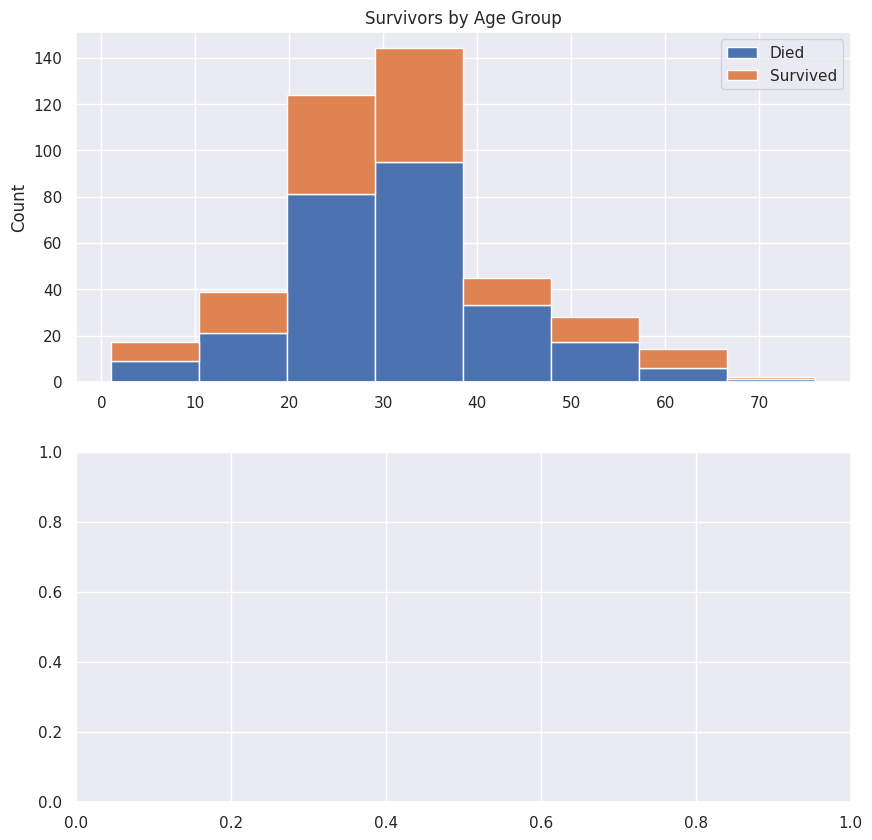

In [ ]:
df1 = mydata[mydata['Survived'] == 0]['Age']
df2 = mydata[mydata['Survived'] == 1]['Age']


max_age = max(mydata['Age'])

fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ax1.hist([df1,df2],
             bins=8,
             range=(1, max_age),
             stacked=True)

ax1.legend(('Died', 'Survived'), loc='best')
ax1.set_title('Survivors by Age Group')
ax1.set_ylabel('Count')






plt.show()


In [ ]:
# Maximum age
mydata['Age'].max()

76.0

In [ ]:

# Survival count by Pclass
pclass_ct = mydata.groupby('Pclass')['Survived'].value_counts().unstack()
pclass_ct

Survived,0,1
Pclass,,
1,57,50
2,63,30
3,146,72


In [ ]:
# Survival Rate
mydata.groupby('Pclass')['Survived'].value_counts(normalize = True).unstack()

Survived,0,1
Pclass,,
1,0.532710,0.467290
2,0.677419,0.322581
3,0.669725,0.330275


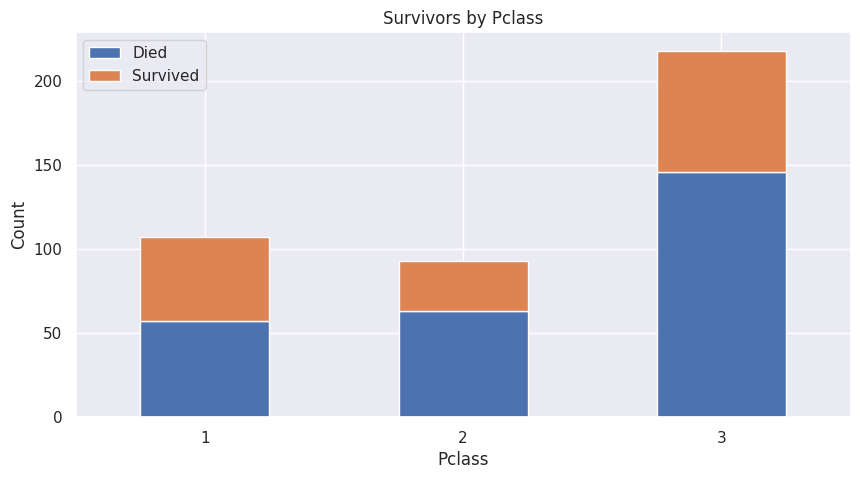

In [ ]:
pclass_ct.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

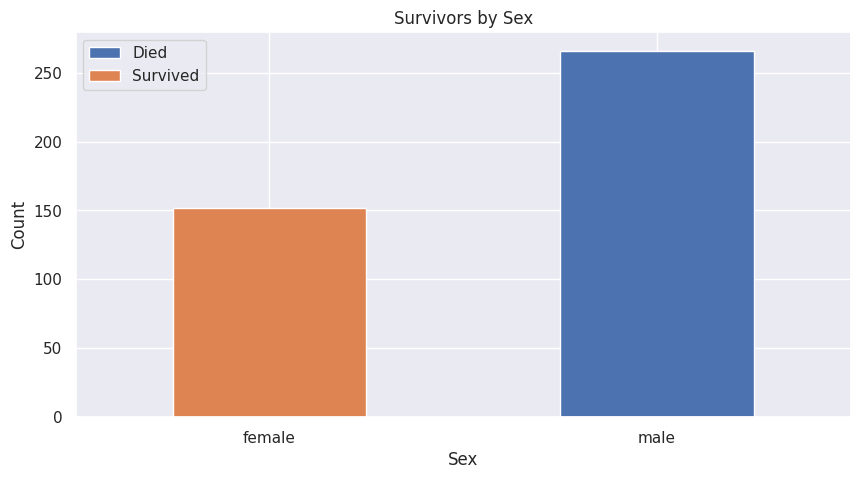

In [ ]:
# Survival count by sex
sex_ct = mydata.groupby('Sex')['Survived'].value_counts().unstack()
sex_ct
mydata.groupby('Sex')['Survived'].value_counts(normalize = True).unstack()
sex_ct.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

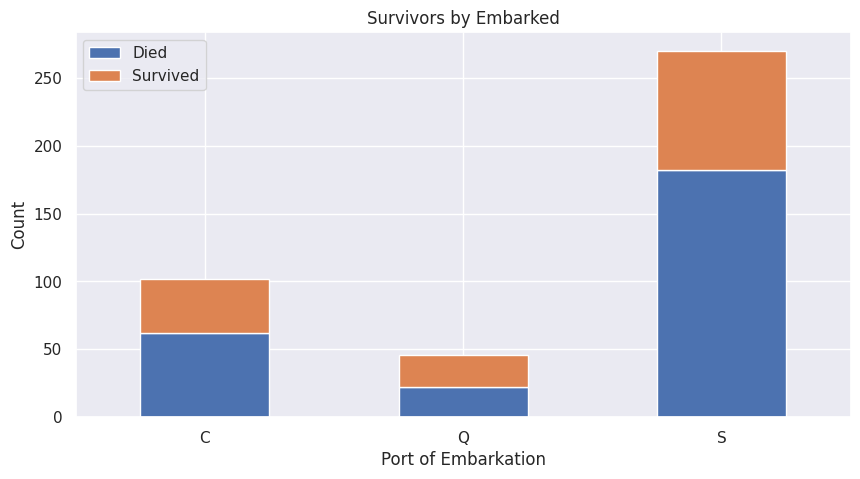

In [ ]:
# Survival count by Embarked

embarked_ct = mydata.groupby('Embarked')['Survived'].value_counts().unstack()
embarked_ct
mydata.groupby('Embarked')['Survived'].value_counts(normalize = True).unstack()
plt.rc('figure', figsize=(10, 5))

embarked_ct.plot(kind='bar', stacked=True, figsize=(10, 5), rot=0)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Embarked')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')

plt.show()

In [ ]:
# Survival count by Sex, Embarked_Numeric, Pclass and Age Category
embarked = mydata['Embarked']
sex = mydata['Sex']
survived = mydata['Survived']
pclass = mydata['Pclass']
age_cat = mydata['Age']
pd.crosstab([sex, embarked, pclass], [survived, age_cat])

Survived                   0                                                  \
Age                    0.33  0.75  0.83  2.00  5.00  6.00  7.00  8.00  9.00    
Sex    Embarked Pclass                                                         
female C        1          0     0     0     0     0     0     0     0     0   
                2          0     0     0     0     0     0     0     0     0   
                3          0     0     0     0     0     0     0     0     0   
       Q        1          0     0     0     0     0     0     0     0     0   
                3          0     0     0     0     0     0     0     0     0   
       S        1          0     0     0     0     0     0     0     0     0   
                2          0     0     0     0     0     0     0     0     0   
                3          0     0     0     0     0     0     0     0     0   
male   C        1          0     0     0     0     0     1     0     0     0   
                2          0     0     0     0     0     0     0     0     0   
                3          0     0     0     0     0     1     1     0     0   
       Q        2          0     0     0     0     0     0     0     0     0   
                3          0     0     0     0     0     0     0     0     0   
       S        1          0     0     0     0     0     0     0     0     0   
                2          0     0     0     1     0     0     0     1     0   
                3          1     1     1     0     1     1     0     0     1   

Survived                      ...     1                                      \
Age                    10.00  ... 51.00 53.00 54.00 55.00 58.00 59.00 60.00   
Sex    Embarked Pclass        ...                                             
female C        1          0  ...     0     1     0     2     1     0     1   
                2          0  ...     0     0     0     0     0     0     0   
                3          0  ...     0     0     0     0     0     0     0   
       Q        1          0  ...     0     0     0     0     0     0     0   
                3          0  ...     0     0     0     0     0     0     0   
       S        1          0  ...     1     0     1     1     0     1     1   
                2          0  ...     0     0     0     0     0     0     1   
                3          0  ...     0     0     0     0     0     0     0   
male   C        1          0  ...     0     0     0     0     0     0     0   
                2          0  ...     0     0     0     0     0     0     0   
                3          0  ...     0     0     0     0     0     0     0   
       Q        2          0  ...     0     0     0     0     0     0     0   
                3          1  ...     0     0     0     0     0     0     0   
       S        1          0  ...     0     0     0     0     0     0     0   
                2          0  ...     0     0     0     0     0     0     0   
                3          0  ...     0     0     0     0     0     0     0   

Survived                                  
Age                    63.00 64.00 76.00  
Sex    Embarked Pclass                    
female C        1          0     1     0  
                2          0     0     0  
                3          0     0     0  
       Q        1          0     0     0  
                3          0     0     0  
       S        1          1     1     1  
                2          0     0     0  
                3          0     0     0  
male   C        1          0     0     0  
                2          0     0     0  
                3          0     0     0  
       Q        2          0     0     0  
                3          0     0     0  
       S        1          0     0     0  
                2          0     0     0  
                3          0     0     0  

[16 rows x 117 columns]